<a href="https://colab.research.google.com/github/jmquintana/jmquintana-email_classifier_2/blob/main/PST_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [ ]:
# Monto mi Google Drive para cargar el DataSet
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargo el DataSet con Pandas como un DataFrame nombrado "df"
# df = pd.read_excel("/content/drive/MyDrive/ColabNotebooks/Gas-2021.xlsx")
# df

In [ ]:
path = r"/content/drive/MyDrive/ColabNotebooks/CSVFiles" # use your path

li = []

for filename in os.listdir(path):
    file = os.path.join(path , filename)
    frame = pd.read_csv(file, index_col=None, header=0, encoding='latin-1')
    frame['Folder']=filename[0:-4]
    li.append(frame)
df = pd.concat(li, axis=0, ignore_index=True)
df.columns

Index(['Subject', 'Body', 'From: (Name)', 'From: (Address)', 'From: (Type)',
       'To: (Name)', 'To: (Address)', 'To: (Type)', 'CC: (Name)',
       'CC: (Address)', 'CC: (Type)', 'BCC: (Name)', 'BCC: (Address)',
       'BCC: (Type)', 'Billing Information', 'Categories', 'Importance',
       'Mileage', 'Sensitivity', 'Folder'],
      dtype='object')

In [ ]:
# Renombro las columnas
df.rename(columns = {'From: (Name)':'From', 'From: (Type)':'FromType',  'To: (Name)':'To',  'To: (Type)':'ToType',  'CC: (Name)':'CC',  'CC: (Type)':'CCType'}, inplace = True)
df = df[['Folder','From', 'To', 'Subject', 'Body']]
df.head()

,Folder,From,To,Subject,Body
0,NOTAS,GALASSI Adrián,MARKOUS Ricardo;MARIN Horacio;PERCZYK Jorge;FE...,Resolución de Ajuste de Pago R46 - Agosto de 2021,Estimados:\r\n\r\n \r\n\r\nEn el día de hoy he...
1,NOTAS,Tecpetrol - Contratos,FERNANDEZ LOBBE Gonzalo;DIVITO Juan Esteban;LA...,FW: NOTIFICACIÓN NO-2021-126743691-APN-SSH#MEC...,\r\n \r\nFrom: PUB:Blas David De Salvo <bdesa...
2,NOTAS,Tecpetrol - Contratos,FERNANDEZ LOBBE Gonzalo;DIVITO Juan Esteban;LA...,FW: NOTIFICACIÓN RESOL-2021-1289-APN-SE#MEC - ...,\r\n \r\nFrom: PUB:Augusto Cesar Fleitas <afl...
3,NOTAS,Tecpetrol - Contratos,FERNANDEZ LOBBE Gonzalo;DIVITO Juan Esteban;LA...,FW: NOTIFICACIÓN NO-2022-00524984-APN-SSH#MEC ...,\r\n \r\nFrom: PUB:Blas David De Salvo <bdesa...
4,NOTAS,PUB:lahera@gmail.com,QUINTANA Jose Maria,RE: Borrador Plan Gas 4 - Nov/21 definitiva,Attention: This email was sent from someone ou...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Folder   3850 non-null   object
 1   From     3850 non-null   object
 2   To       3723 non-null   object
 3   Subject  3849 non-null   object
 4   Body     3827 non-null   object
dtypes: object(5)
memory usage: 150.5+ KB


In [ ]:
folders = df.Folder.value_counts().index
folders

Index(['SERVICIOS', 'OTROS', 'VENTAS', 'SISTEMAS', 'FACTURACION',
       'EXPORTACION', 'PROVEEDORES', 'AREAS', 'INFORMES', 'SOCIOS', 'FINANZAS',
       'PROVISIONES', 'NOTAS', 'CREDITO', 'IMPUESTOS', 'CLIENTES', 'ENTES',
       'BUDGET', 'AUDITORIA', 'COMPLIANCE'],
      dtype='object')

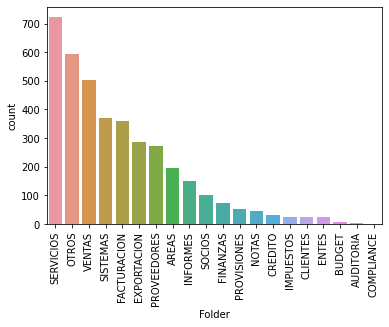

In [ ]:
sns.countplot(data=df, x='Folder', order=folders)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.isna().sum()

Folder       0
From         0
To         127
Subject      1
Body        23
dtype: int64

In [ ]:
df[df.isna().Subject]

,Folder,From,To,Subject,Body
2851,FACTURACION,SCHIAVELLI Hernan,QUINTANA Jose Maria,NaN,\r\n\r\n \r\n\r\n \r\n\r\n\r\n\r\n \r\n\r\nHe...


In [ ]:
mask = df.groupby('From').count()>5

In [ ]:
df2 = df.groupby('From').count()

In [ ]:
df2 = df2[mask.Folder]

In [ ]:
df2 = df2.sort_values(by='Folder', ascending=False)

In [ ]:
from_filtrado = df2.index

In [ ]:
df = df[~df.From.isna()]

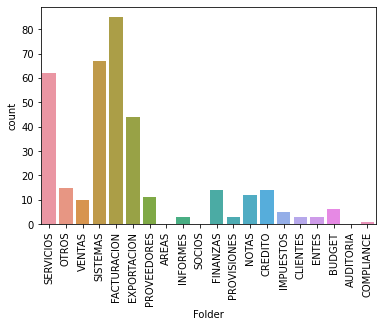

In [ ]:
sns.countplot(data=df[df.From.str.contains("SCH")], x='Folder', order=folders)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.columns

Index(['Folder', 'From', 'To', 'Subject', 'Body'], dtype='object')

In [ ]:
data = df.copy()
data['Mail'] = data['Subject'].str.cat(data['Body'],sep=" ")
data = data[['From', 'To', 'Subject', 'Body', 'Folder', 'Mail']]
# data = data[data.Folder.isin(folders[:10])]
data

,From,To,Subject,Body,Folder,Mail
0,GALASSI Adrián,MARKOUS Ricardo;MARIN Horacio;PERCZYK Jorge;FE...,Resolución de Ajuste de Pago R46 - Agosto de 2021,Estimados:\r\n\r\n \r\n\r\nEn el día de hoy he...,NOTAS,Resolución de Ajuste de Pago R46 - Agosto de 2...
1,Tecpetrol - Contratos,FERNANDEZ LOBBE Gonzalo;DIVITO Juan Esteban;LA...,FW: NOTIFICACIÓN NO-2021-126743691-APN-SSH#MEC...,\r\n \r\nFrom: PUB:Blas David De Salvo <bdesa...,NOTAS,FW: NOTIFICACIÓN NO-2021-126743691-APN-SSH#MEC...
2,Tecpetrol - Contratos,FERNANDEZ LOBBE Gonzalo;DIVITO Juan Esteban;LA...,FW: NOTIFICACIÓN RESOL-2021-1289-APN-SE#MEC - ...,\r\n \r\nFrom: PUB:Augusto Cesar Fleitas <afl...,NOTAS,FW: NOTIFICACIÓN RESOL-2021-1289-APN-SE#MEC - ...
3,Tecpetrol - Contratos,FERNANDEZ LOBBE Gonzalo;DIVITO Juan Esteban;LA...,FW: NOTIFICACIÓN NO-2022-00524984-APN-SSH#MEC ...,\r\n \r\nFrom: PUB:Blas David De Salvo <bdesa...,NOTAS,FW: NOTIFICACIÓN NO-2022-00524984-APN-SSH#MEC ...
4,PUB:lahera@gmail.com,QUINTANA Jose Maria,RE: Borrador Plan Gas 4 - Nov/21 definitiva,Attention: This email was sent from someone ou...,NOTAS,RE: Borrador Plan Gas 4 - Nov/21 definitiva At...
...,...,...,...,...,...,...
3845,FERNANDEZ Odín,BLASCO Gustavo Angel;MARIN Horacio;PERCZYK Jor...,Resumen Operativo Diario Aguaragüe,\r\n\r\n \r\n\r\nSaludos.\r\n\r\nOdin Fernánde...,AREAS,Resumen Operativo Diario Aguaragüe \r\n\r\n \r...
3846,JEREZ Karina,SEÑORAN Federico;SANTIN Florencia Dana,RE: Cierre stock crudo julio/22,"Se adjunta el definitivo de FP, con el agregad...",AREAS,RE: Cierre stock crudo julio/22 Se adjunta el ...
3847,CARPANO Patricia,QUINTANA Jose Maria,RE: SESCO - Julio 2022,De nada y es no convencional.\r\n\r\n \r\n\r\n...,AREAS,RE: SESCO - Julio 2022 De nada y es no convenc...
3848,CARPANO Patricia,QUINTANA Jose Maria,RE: SESCO - Julio 2022,"Hola José buen día, en julio tenemos producció...",AREAS,"RE: SESCO - Julio 2022 Hola José buen día, en ..."


In [ ]:
data.isna().sum()
data = data.dropna()

In [ ]:
# X = data.drop(['Folder'], axis=1)
X = data.Subject
y = data.Folder

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
data

,From,To,Subject,Body,Folder,Mail
0,GALASSI Adrián,MARKOUS Ricardo;MARIN Horacio;PERCZYK Jorge;FE...,Resolución de Ajuste de Pago R46 - Agosto de 2021,Estimados:\r\n\r\n \r\n\r\nEn el día de hoy he...,NOTAS,Resolución de Ajuste de Pago R46 - Agosto de 2...
1,Tecpetrol - Contratos,FERNANDEZ LOBBE Gonzalo;DIVITO Juan Esteban;LA...,FW: NOTIFICACIÓN NO-2021-126743691-APN-SSH#MEC...,\r\n \r\nFrom: PUB:Blas David De Salvo <bdesa...,NOTAS,FW: NOTIFICACIÓN NO-2021-126743691-APN-SSH#MEC...
2,Tecpetrol - Contratos,FERNANDEZ LOBBE Gonzalo;DIVITO Juan Esteban;LA...,FW: NOTIFICACIÓN RESOL-2021-1289-APN-SE#MEC - ...,\r\n \r\nFrom: PUB:Augusto Cesar Fleitas <afl...,NOTAS,FW: NOTIFICACIÓN RESOL-2021-1289-APN-SE#MEC - ...
3,Tecpetrol - Contratos,FERNANDEZ LOBBE Gonzalo;DIVITO Juan Esteban;LA...,FW: NOTIFICACIÓN NO-2022-00524984-APN-SSH#MEC ...,\r\n \r\nFrom: PUB:Blas David De Salvo <bdesa...,NOTAS,FW: NOTIFICACIÓN NO-2022-00524984-APN-SSH#MEC ...
4,PUB:lahera@gmail.com,QUINTANA Jose Maria,RE: Borrador Plan Gas 4 - Nov/21 definitiva,Attention: This email was sent from someone ou...,NOTAS,RE: Borrador Plan Gas 4 - Nov/21 definitiva At...
...,...,...,...,...,...,...
3845,FERNANDEZ Odín,BLASCO Gustavo Angel;MARIN Horacio;PERCZYK Jor...,Resumen Operativo Diario Aguaragüe,\r\n\r\n \r\n\r\nSaludos.\r\n\r\nOdin Fernánde...,AREAS,Resumen Operativo Diario Aguaragüe \r\n\r\n \r...
3846,JEREZ Karina,SEÑORAN Federico;SANTIN Florencia Dana,RE: Cierre stock crudo julio/22,"Se adjunta el definitivo de FP, con el agregad...",AREAS,RE: Cierre stock crudo julio/22 Se adjunta el ...
3847,CARPANO Patricia,QUINTANA Jose Maria,RE: SESCO - Julio 2022,De nada y es no convencional.\r\n\r\n \r\n\r\n...,AREAS,RE: SESCO - Julio 2022 De nada y es no convenc...
3848,CARPANO Patricia,QUINTANA Jose Maria,RE: SESCO - Julio 2022,"Hola José buen día, en julio tenemos producció...",AREAS,"RE: SESCO - Julio 2022 Hola José buen día, en ..."


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(data.Body).toarray()

labels = data.Folder

In [ ]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               data.index, test_size=0.25)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Create a new column 'category_id' with encoded categories 
data['category_id'] = data['Folder'].factorize()[0]
category_id_df = data[['Folder', 'category_id']].drop_duplicates()

# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Folder']].values)

# New dataframe
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,From,To,Subject,Body,Folder,Mail,category_id
0,GALASSI Adrián,MARKOUS Ricardo;MARIN Horacio;PERCZYK Jorge;FE...,Resolución de Ajuste de Pago R46 - Agosto de 2021,Estimados:\r\n\r\n \r\n\r\nEn el día de hoy he...,NOTAS,Resolución de Ajuste de Pago R46 - Agosto de 2...,0
1,Tecpetrol - Contratos,FERNANDEZ LOBBE Gonzalo;DIVITO Juan Esteban;LA...,FW: NOTIFICACIÓN NO-2021-126743691-APN-SSH#MEC...,\r\n \r\nFrom: PUB:Blas David De Salvo <bdesa...,NOTAS,FW: NOTIFICACIÓN NO-2021-126743691-APN-SSH#MEC...,0
2,Tecpetrol - Contratos,FERNANDEZ LOBBE Gonzalo;DIVITO Juan Esteban;LA...,FW: NOTIFICACIÓN RESOL-2021-1289-APN-SE#MEC - ...,\r\n \r\nFrom: PUB:Augusto Cesar Fleitas <afl...,NOTAS,FW: NOTIFICACIÓN RESOL-2021-1289-APN-SE#MEC - ...,0
3,Tecpetrol - Contratos,FERNANDEZ LOBBE Gonzalo;DIVITO Juan Esteban;LA...,FW: NOTIFICACIÓN NO-2022-00524984-APN-SSH#MEC ...,\r\n \r\nFrom: PUB:Blas David De Salvo <bdesa...,NOTAS,FW: NOTIFICACIÓN NO-2022-00524984-APN-SSH#MEC ...,0
4,PUB:lahera@gmail.com,QUINTANA Jose Maria,RE: Borrador Plan Gas 4 - Nov/21 definitiva,Attention: This email was sent from someone ou...,NOTAS,RE: Borrador Plan Gas 4 - Nov/21 definitiva At...,0


In [ ]:
labels = y_test.value_counts()
labels

SERVICIOS      171
OTROS          124
VENTAS         121
FACTURACION    104
SISTEMAS        82
EXPORTACION     71
PROVEEDORES     66
AREAS           49
SOCIOS          30
INFORMES        28
FINANZAS        21
PROVISIONES     13
NOTAS           11
CREDITO         10
CLIENTES         7
ENTES            7
IMPUESTOS        6
AUDITORIA        2
BUDGET           2
Name: Folder, dtype: int64

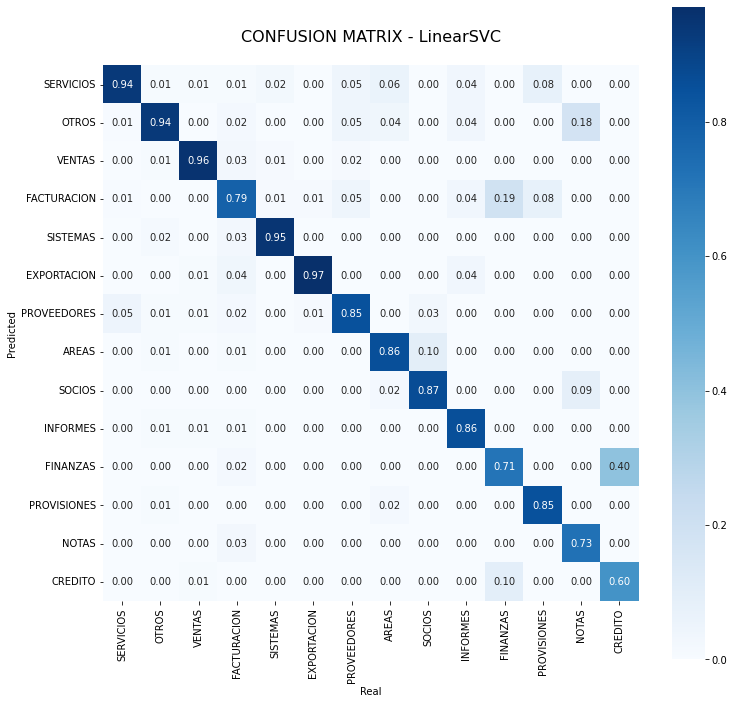

In [ ]:
labels = y_test.value_counts()[y_test.value_counts()>=10].index
conf_mat = confusion_matrix(y_test, y_pred,labels=labels, normalize='true')
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat.T, annot=True, cmap="Blues", fmt='.2f',
            xticklabels=labels, 
            yticklabels=labels,
            square=True)
plt.xlabel('Real')
plt.ylabel('Predicted')

plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [ ]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, labels=labels))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

   SERVICIOS       0.92      0.94      0.93       171
       OTROS       0.89      0.94      0.91       124
      VENTAS       0.95      0.95      0.95       121
 FACTURACION       0.83      0.79      0.81       104
    SISTEMAS       0.93      0.95      0.94        82
 EXPORTACION       0.89      0.94      0.92        71
 PROVEEDORES       0.79      0.85      0.82        66
       AREAS       0.89      0.86      0.88        49
      SOCIOS       0.93      0.87      0.90        30
    INFORMES       0.89      0.86      0.87        28
    FINANZAS       0.68      0.71      0.70        21
 PROVISIONES       0.85      0.85      0.85        13
       NOTAS       0.73      0.73      0.73        11

   micro avg       0.89      0.90      0.89       891
   macro avg       0.86      0.86      0.86       891
weighted avg       0.89      0.90      0.89       891

